In [1]:
import pandas as pd

# Load the datasets
spring_path = r'C:\Users\seaso\Desktop\Boishakh\cleaned_spring2023.csv'
fall_path = r'C:\Users\seaso\Desktop\Boishakh\cleaned_fall2023.csv'
spring_df = pd.read_csv(spring_path)
fall_df = pd.read_csv(fall_path)

# Add term columns
spring_df['Term'] = 'Spring 2023'
fall_df['Term'] = 'Fall 2023'

# Merge the datasets
combined_df = pd.concat([spring_df, fall_df], ignore_index=True)

# Data Cleaning
# Standardize time format
def standardize_time(time_str):
    if pd.isna(time_str):
        return None
    time_str = str(time_str).strip()
    return time_str[:-2] + ':' + time_str[-2:]

combined_df['begin'] = combined_df['begin'].apply(standardize_time)
combined_df['end'] = combined_df['end'].apply(standardize_time)

# Convert 'day' and other categorical data to appropriate types
combined_df['day'] = combined_df['day'].astype('category')

# Handle missing values
combined_df = combined_df.fillna({
    'prereq1': 'None',
    'prereq2': 'None'
})

# Ensure numeric columns are of type int where applicable
numeric_cols = ['num', 'section', 'class_num', 'units']
for col in numeric_cols:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce').astype('Int64')

# Save the cleaned combined dataset
combined_dataset_path = r'C:\Users\seaso\Desktop\Boishakh\combined_dataset.csv'
combined_df.to_csv(combined_dataset_path, index=False)


Summary Statistics:
               num     section     class_num       units    computer  \
count  287.000000  291.000000    291.000000  291.000000  290.000000   
mean   336.648084    2.378007   4667.096220    1.927835    0.455172   
std    139.097534    1.748319   2608.154241    1.258741    0.498847   
min    100.000000    1.000000   1777.000000    0.000000    0.000000   
25%    220.000000    1.000000   2087.500000    1.000000    0.000000   
50%    307.000000    2.000000   5336.000000    3.000000    0.000000   
75%    444.000000    3.000000   6203.500000    3.000000    1.000000   
max    697.000000   10.000000  10591.000000    4.000000    1.000000   

       electrical  mechanical       civil  
count  290.000000  289.000000  289.000000  
mean     0.410345    0.525952    0.429066  
std      0.492747    0.500192    0.495801  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    1.000000    0.000000  
75%      1.000000    1.000000  

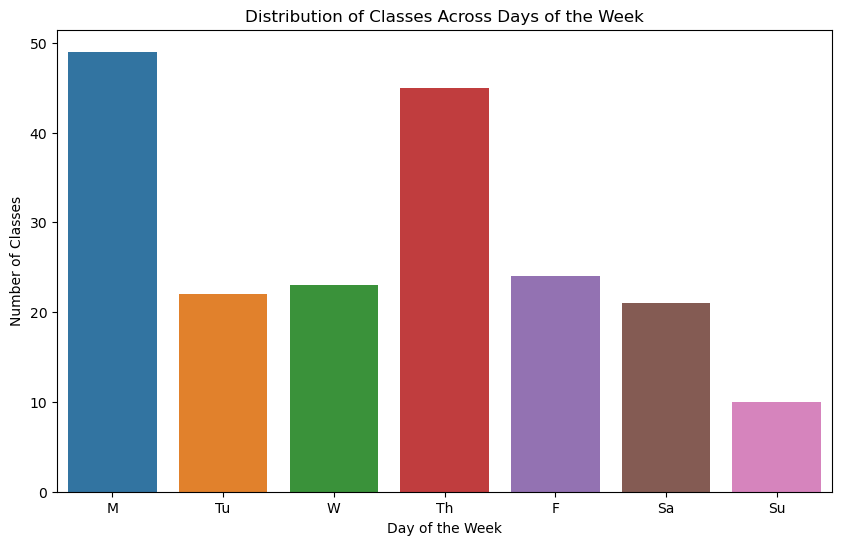

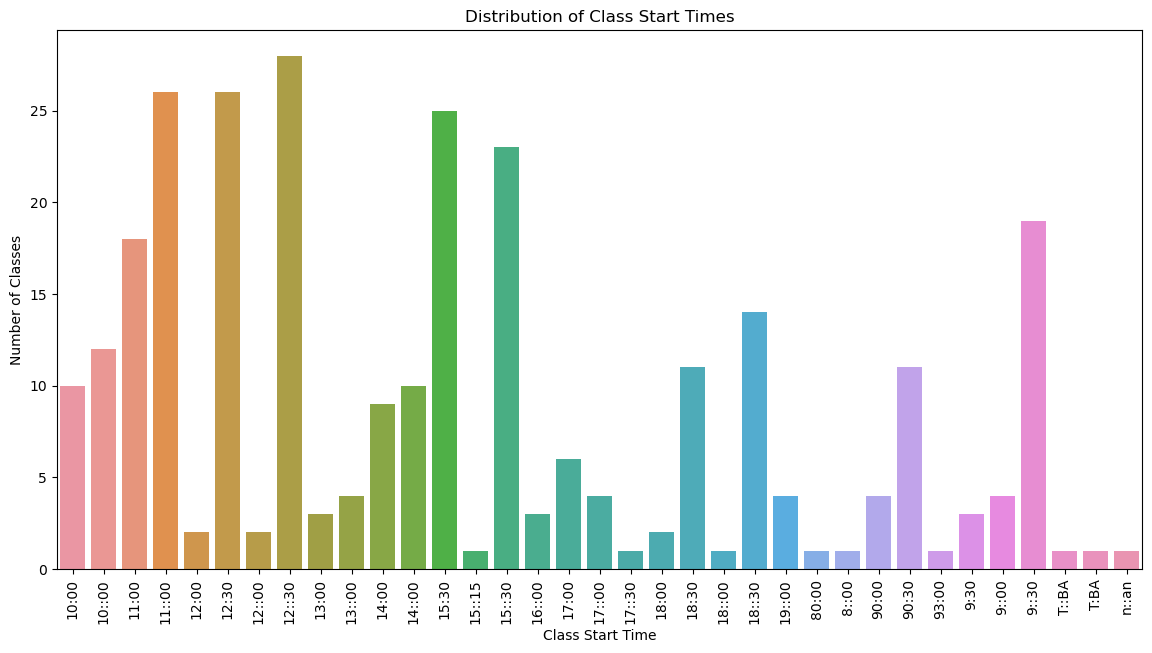

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset
combined_dataset_path = r'C:\Users\seaso\Desktop\Boishakh\combined_dataset.csv'
data = pd.read_csv(combined_dataset_path)

# Exploratory Data Analysis
print("Summary Statistics:\n", data.describe())
print("Distribution of Courses across Days:\n", data['day'].value_counts())
print("Distribution of Class Start Times:\n", data['begin'].value_counts())

# Visualization of classes across different days
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=data, order=['M', 'Tu', 'W', 'Th', 'F', 'Sa', 'Su'])
plt.title('Distribution of Classes Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Classes')
plt.show()

# Visualization of class start times
plt.figure(figsize=(14, 7))
sns.countplot(x='begin', data=data, order=sorted(data['begin'].unique()))
plt.title('Distribution of Class Start Times')
plt.xticks(rotation=90)
plt.xlabel('Class Start Time')
plt.ylabel('Number of Classes')
plt.show()



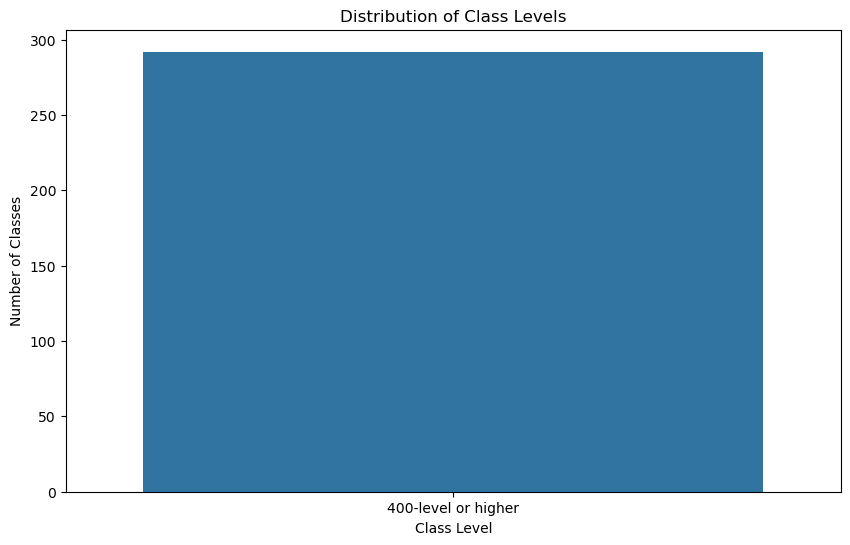

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset
combined_dataset_path = r'C:\Users\seaso\Desktop\Boishakh\combined_dataset.csv'
data = pd.read_csv(combined_dataset_path)

# First, we need to define a function that determines the class level based on class_num
def determine_level(class_num):
    if 100 <= class_num < 200:
        return '100-level'
    elif 200 <= class_num < 300:
        return '200-level'
    elif 300 <= class_num < 400:
        return '300-level'
    # Add more conditions as necessary
    else:
        return '400-level or higher'

# Now, we apply this function to the class_num column to create a new 'level' column
data['level'] = data['class_num'].apply(determine_level)

# Now let's retry the Class Level Analysis
class_level_counts = data['level'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=class_level_counts.index, y=class_level_counts.values)
plt.title('Distribution of Class Levels')
plt.xlabel('Class Level')
plt.ylabel('Number of Classes')
plt.show()


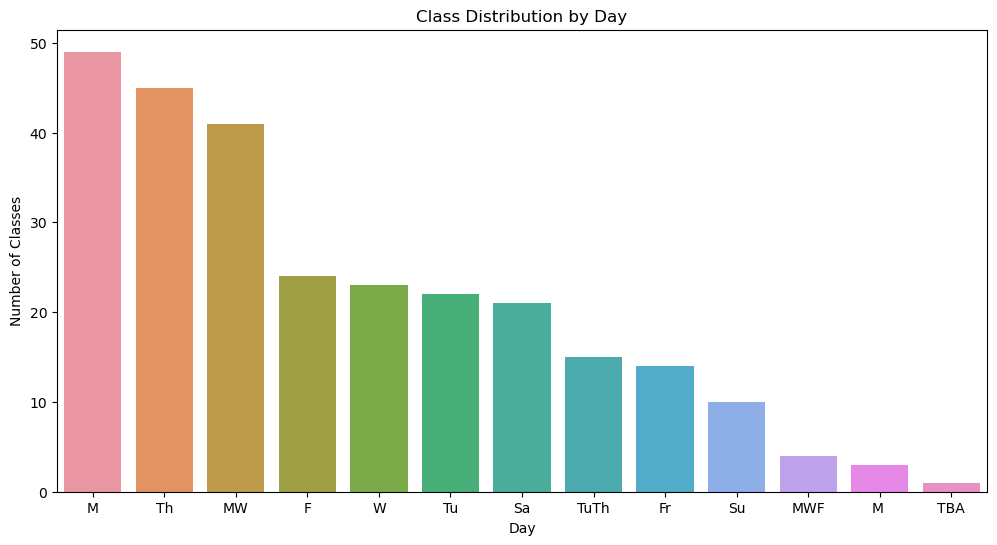

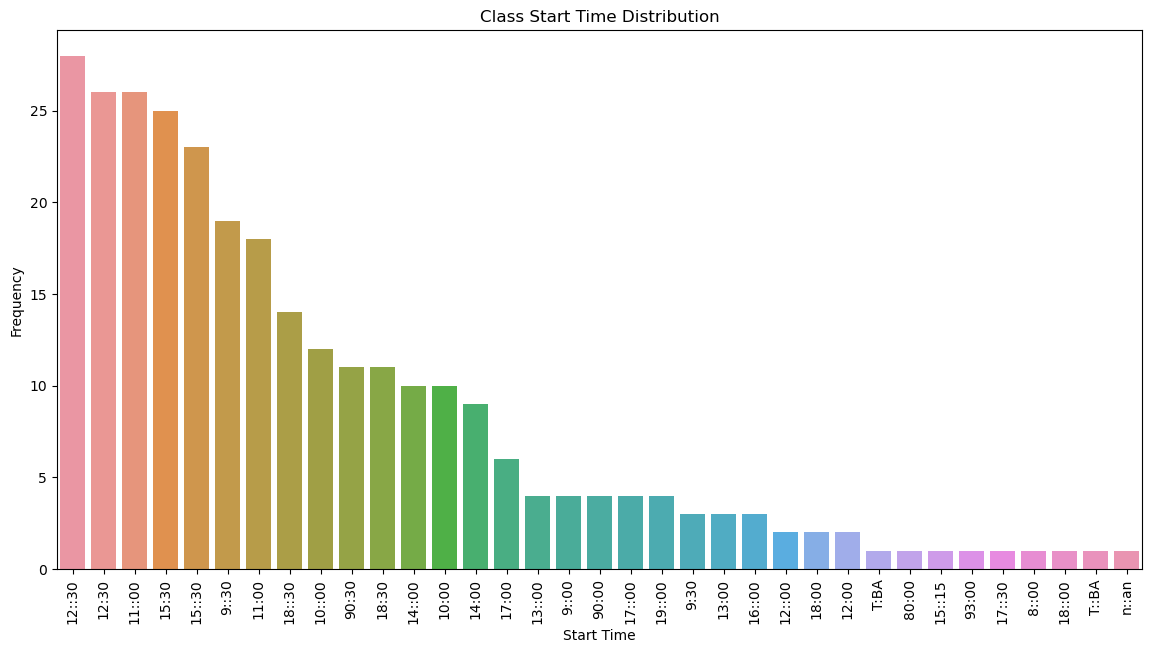

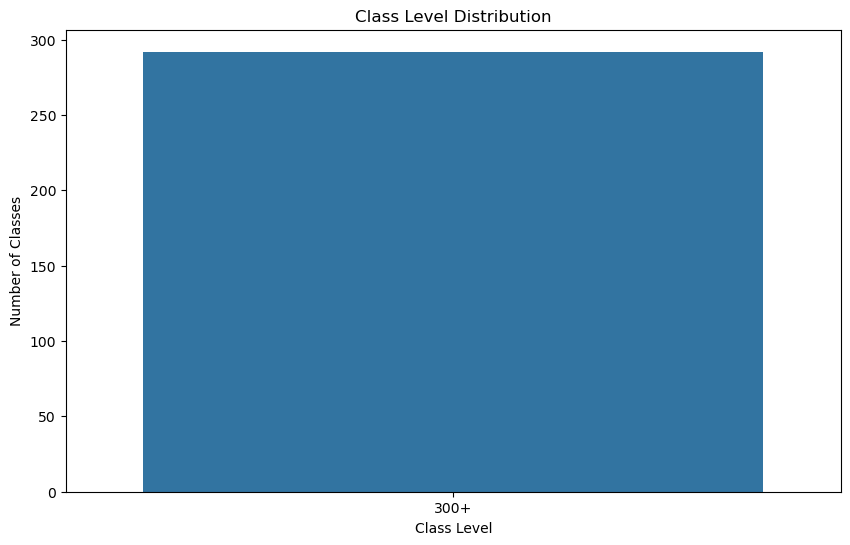

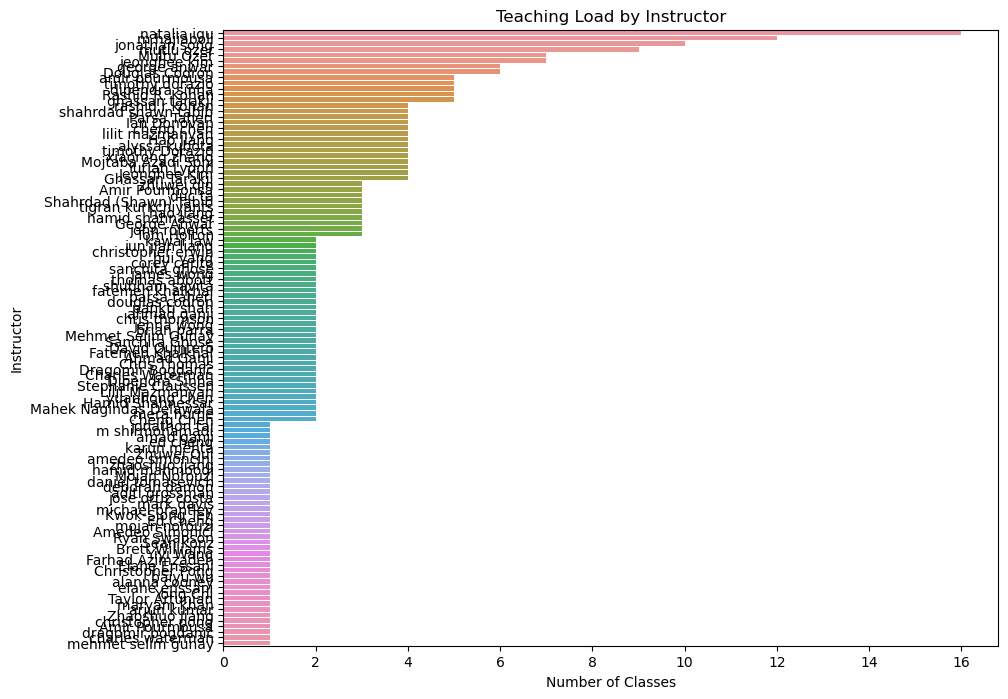

              num     section     class_num       units    computer  \
count  287.000000  291.000000    291.000000  291.000000  290.000000   
mean   336.648084    2.378007   4667.096220    1.927835    0.455172   
std    139.097534    1.748319   2608.154241    1.258741    0.498847   
min    100.000000    1.000000   1777.000000    0.000000    0.000000   
25%    220.000000    1.000000   2087.500000    1.000000    0.000000   
50%    307.000000    2.000000   5336.000000    3.000000    0.000000   
75%    444.000000    3.000000   6203.500000    3.000000    1.000000   
max    697.000000   10.000000  10591.000000    4.000000    1.000000   

       electrical  mechanical       civil  
count  290.000000  289.000000  289.000000  
mean     0.410345    0.525952    0.429066  
std      0.492747    0.500192    0.495801  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    1.000000    0.000000  
75%      1.000000    1.000000    1.000000  
max     

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your combined dataset
data = pd.read_csv(r'C:\Users\seaso\Desktop\Boishakh\combined_dataset.csv')

# Normalize 'begin' times if needed
# data['begin'] = data['begin'].apply(lambda x: normalize_time(x))  # Define normalize_time function based on your time format

# Day Distribution
day_counts = data['day'].value_counts()

# Start Time Distribution
# Ensure the 'begin' column is in the correct format, then get the count
start_time_counts = data['begin'].value_counts()

# Class Level Distribution
# Assuming the class level can be inferred from class numbers
data['level'] = data['class_num'].apply(lambda x: '100-200' if x < 300 else '300+')
level_counts = data['level'].value_counts()

# Professor Teaching Load
teaching_load = data['instructor'].value_counts()

# Now we plot these distributions

# Day Distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=day_counts.index, y=day_counts.values)
plt.title('Class Distribution by Day')
plt.xlabel('Day')
plt.ylabel('Number of Classes')
plt.show()

# Start Time Distribution
plt.figure(figsize=(14, 7))
sns.barplot(x=start_time_counts.index, y=start_time_counts.values)
plt.title('Class Start Time Distribution')
plt.xlabel('Start Time')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Class Level Distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=level_counts.index, y=level_counts.values)
plt.title('Class Level Distribution')
plt.xlabel('Class Level')
plt.ylabel('Number of Classes')
plt.show()

# Professor Teaching Load
plt.figure(figsize=(10, 8))
sns.barplot(x=teaching_load.values, y=teaching_load.index)
plt.title('Teaching Load by Instructor')
plt.xlabel('Number of Classes')
plt.ylabel('Instructor')
plt.show()

# Save your figures if you want to use them in reports or presentations
# plt.savefig('path_to_save_figure.png')

# Assuming 'data' is your DataFrame with the combined data

# Summary Statistics
summary_statistics = data.describe()

# You can print these statistics or save them to a CSV
print(summary_statistics)
# Or save to CSV
summary_statistics.to_csv('path_to_your_summary_statistics.csv')

# The `describe()` function automatically excludes NaN values and categorical/non-numeric data
# By default, it provides count, mean, std, min, 25%, 50%, 75%, max for each numerical column


In [5]:
# Assuming you have two DataFrames: spring_df and fall_df for your datasets
spring_df = pd.read_csv(r'C:\Users\seaso\Desktop\Boishakh\cleaned_spring2023.csv')
fall_df = pd.read_csv(r'C:\Users\seaso\Desktop\Boishakh\cleaned_fall2023.csv')

# Calculate summary statistics and compare
spring_stats = spring_df.describe()
fall_stats = fall_df.describe()

# Comparison of summary statistics
comparison_stats = pd.concat([spring_stats, fall_stats], axis=1, keys=['Spring', 'Fall'])

# Identify peak times in both datasets
spring_peak_times = spring_df['begin'].value_counts().head()
fall_peak_times = fall_df['begin'].value_counts().head()

# Define a function to calculate conflicts based on overlapping times
def calculate_conflicts(df):
    # Pivot table to count the number of classes at each time slot for each day
    time_slots = pd.pivot_table(df, index='begin', columns='day', aggfunc='size', fill_value=0)
    
    # A conflict is when there is more than one class at the same time slot
    conflicts = time_slots[time_slots > 1].sum().sum()
    return conflicts

# Calculate the number of conflicts for each term and the combined dataset
spring_conflicts = calculate_conflicts(spring_df)
fall_conflicts = calculate_conflicts(fall_df)
combined_conflicts = calculate_conflicts(combined_df)  # assuming combined_df is your combined DataFrame

# Output the number of conflicts
print(f'Number of conflicts in Spring: {spring_conflicts}')
print(f'Number of conflicts in Fall: {fall_conflicts}')
print(f'Number of conflicts in Combined dataset: {combined_conflicts}')

# If needed, you can also explore visualizing the conflict data using bar charts or heatmaps


Number of conflicts in Spring: 112.0
Number of conflicts in Fall: 122.0
Number of conflicts in Combined dataset: 234.0


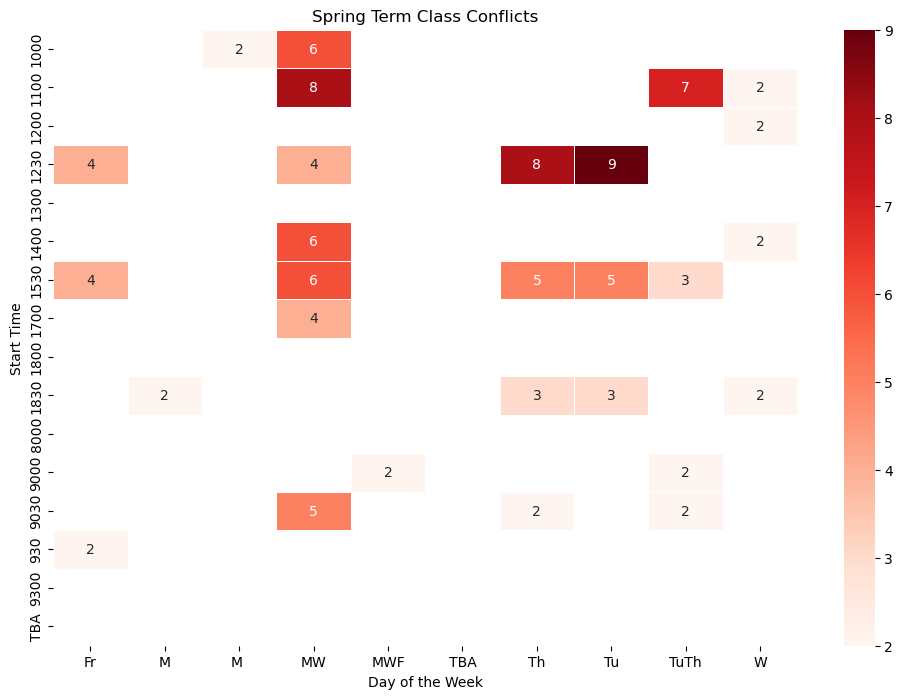

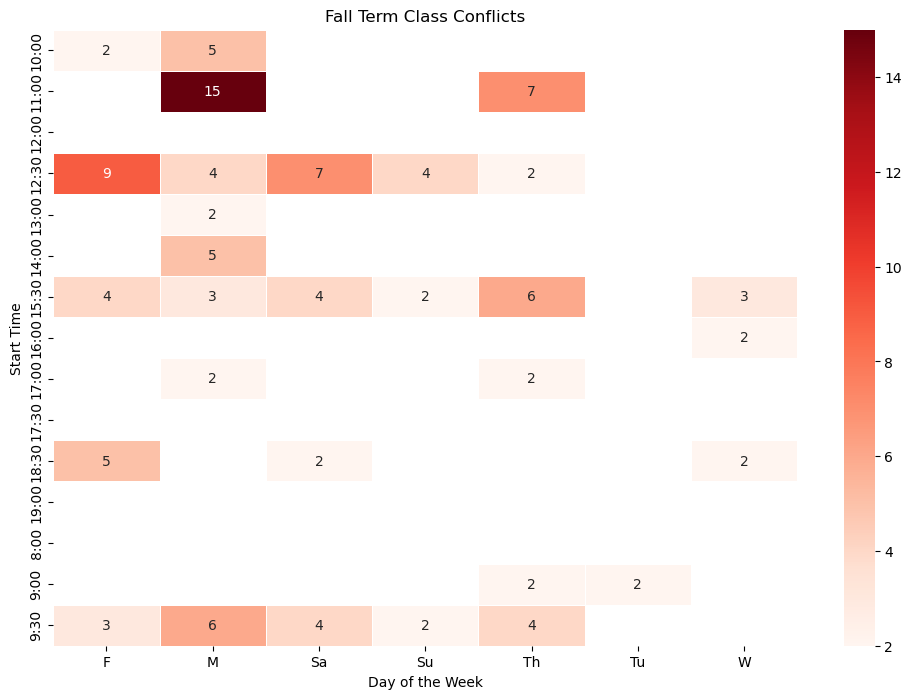

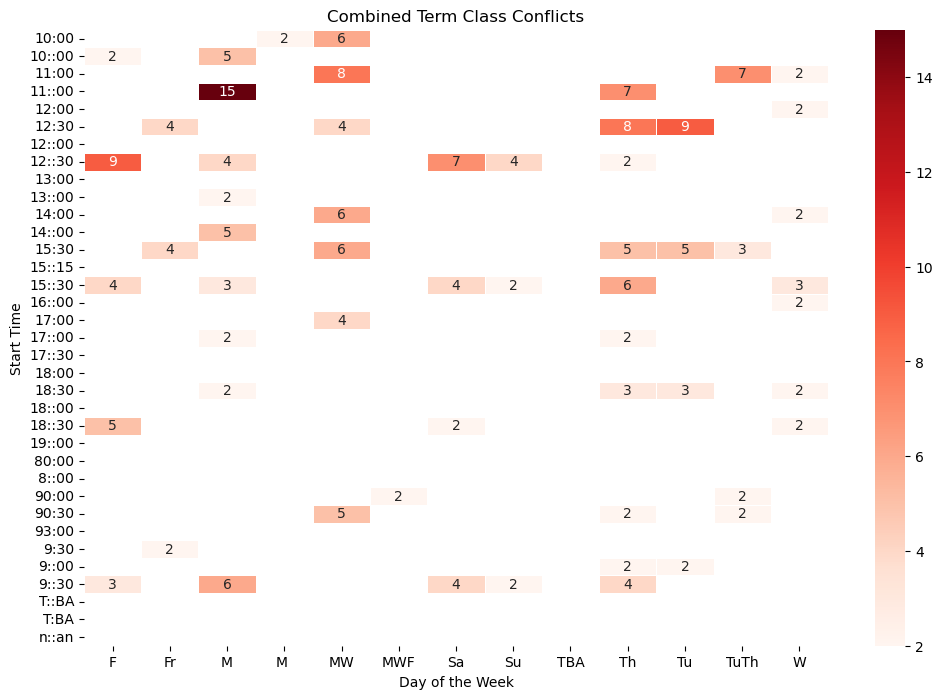

In [6]:
# Visualize the conflicts using heatmaps.

# Assuming 'begin' is the class start time and 'day' is the day of the week
# Function to create a pivot table for heatmap visualization
def create_heatmap(df, title):
    # Create a pivot table with counts of classes at each start time and day
    heatmap_data = pd.pivot_table(df, index='begin', columns='day', aggfunc='size', fill_value=0)
    
    # Any value above 1 indicates a conflict, so we'll highlight those
    conflict_data = heatmap_data.where(heatmap_data > 1)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(conflict_data, cmap='Reds', linewidths=.5, annot=True, fmt=".0f")
    plt.title(title)
    plt.xlabel('Day of the Week')
    plt.ylabel('Start Time')
    plt.show()

# Create heatmaps for each dataset
create_heatmap(spring_df, 'Spring Term Class Conflicts')
create_heatmap(fall_df, 'Fall Term Class Conflicts')
create_heatmap(combined_df, 'Combined Term Class Conflicts')


In [7]:
import pandas as pd


# Improved function to convert 'begin' times to minutes since midnight
def parse_time_to_minutes(time_str):
    if pd.isnull(time_str) or isinstance(time_str, str) and ('TBA' in time_str or 'nan' in time_str):
        return None
    try:
        # Handle times without colon
        if time_str.isdigit() and len(time_str) == 4:
            time_str = time_str[:2] + ':' + time_str[2:]
        # Handle times with 'TBA' or similar issues
        if ':' not in time_str:
            return None
        hours, minutes = map(int, time_str.split(':'))
        return hours * 60 + minutes
    except (ValueError, TypeError) as e:
        print(f"Error converting time: {time_str} - {str(e)}")
        return None

# Function to calculate direct conflicts
def calculate_direct_conflicts(df):
    # Create a pivot table counting the number of classes at each start time for each day
    time_counts = df.pivot_table(index='start_time_minutes', columns='day', aggfunc='size', fill_value=0)
    # Sum the counts where there are more than one class at the same time slot
    conflicts = time_counts[time_counts > 1].sum().sum()
    return conflicts

# Load the datasets

spring_df = pd.read_csv(r'C:\Users\seaso\Desktop\Boishakh\cleaned_spring2023.csv')
fall_df = pd.read_csv(r'C:\Users\seaso\Desktop\Boishakh\cleaned_fall2023.csv')

# Ensure 'begin' column is a string
spring_df['begin'] = spring_df['begin'].astype(str)
fall_df['begin'] = fall_df['begin'].astype(str)

# Apply the time conversion to both datasets
spring_df['start_time_minutes'] = spring_df['begin'].apply(parse_time_to_minutes)
fall_df['start_time_minutes'] = fall_df['begin'].apply(parse_time_to_minutes)

# Calculate conflict scores for each term and the combined dataset
spring_conflict_score = calculate_direct_conflicts(spring_df)
fall_conflict_score = calculate_direct_conflicts(fall_df)
combined_df = pd.concat([spring_df, fall_df])
combined_conflict_score = calculate_direct_conflicts(combined_df)

# Output the raw conflict scores
print(f'Spring raw conflict score: {spring_conflict_score}')
print(f'Fall raw conflict score: {fall_conflict_score}')
print(f'Combined raw conflict score: {combined_conflict_score}')


Error converting time: T:BA - invalid literal for int() with base 10: 'T'
Error converting time: n:an - invalid literal for int() with base 10: 'n'
Spring raw conflict score: 110.0
Fall raw conflict score: 122.0
Combined raw conflict score: 240.0


In [8]:
import pandas as pd

# Load the combined dataset
combined_df = pd.read_csv(r'C:\Users\seaso\Desktop\Boishakh\combined_dataset.csv')


# A function to convert prerequisite columns to lists of course numbers, empty list if 'None'
def prerequisites_to_list(prereqs):
    if pd.isnull(prereqs) or prereqs == 'None':
        return []
    return prereqs.split(' ')  # Assuming that multiple prerequisites are space-separated

# Apply the function to your prerequisites columns
combined_df['prereq1_list'] = combined_df['prereq1'].apply(prerequisites_to_list)
combined_df['prereq2_list'] = combined_df['prereq2'].apply(prerequisites_to_list)

# Optionally, combine both prerequisite lists into one column for easier access
combined_df['all_prereqs'] = combined_df.apply(lambda row: row['prereq1_list'] + row['prereq2_list'], axis=1)

# Now combined_df has two new columns with prerequisite courses as lists, which can be used for further analysis.""
# Display the first few rows of the DataFrame to verify the new columns
print(combined_df[['prereq1', 'prereq1_list', 'prereq2', 'prereq2_list', 'all_prereqs']].head())

# Check how many non-empty prerequisites there are
non_empty_prereqs = combined_df[~combined_df['prereq1'].isnull() | ~combined_df['prereq2'].isnull()]
print(f"Entries with prerequisites: {len(non_empty_prereqs)}")

# Assuming you have a list of all unique prerequisites in the dataset
unique_prereqs = set(prereq for sublist in combined_df['all_prereqs'].tolist() for prereq in sublist)

# Initialize columns for each prerequisite with default value of 0
for prereq in unique_prereqs:
    combined_df[f'prereq_{prereq}'] = 0

# Set the value to 1 where the prerequisite is present for a course
for index, row in combined_df.iterrows():
    for prereq in row['all_prereqs']:
        combined_df.at[index, f'prereq_{prereq}'] = 1




    prereq1 prereq1_list prereq2 prereq2_list  all_prereqs
0       NaN           []     NaN           []           []
1       NaN           []     NaN           []           []
2       NaN           []     NaN           []           []
3       NaN           []     NaN           []           []
4  engr 100  [engr, 100]     NaN           []  [engr, 100]
Entries with prerequisites: 252


In [9]:
import pandas as pd

# Load the datasets
spring_df = pd.read_csv(r'C:\Users\seaso\Desktop\Boishakh\cleaned_spring2023.csv')
fall_df = pd.read_csv(r'C:\Users\seaso\Desktop\Boishakh\cleaned_fall2023.csv')

# Combine the datasets
combined_df = pd.concat([spring_df, fall_df], ignore_index=True)

# Convert 'prereq1' and 'prereq2' from strings to lists
def split_prerequisites(prereqs):
    if pd.isna(prereqs) or prereqs == 'None':
        return []
    return prereqs.split()  # Assuming that prerequisites are space-separated

combined_df['prereq1_list'] = combined_df['prereq1'].apply(split_prerequisites)
combined_df['prereq2_list'] = combined_df['prereq2'].apply(split_prerequisites)

# Combine 'prereq1_list' and 'prereq2_list' into 'all_prereqs'
combined_df['all_prereqs'] = combined_df.apply(
    lambda row: row['prereq1_list'] + row['prereq2_list'], axis=1
)

# Validate the format of prerequisites lists
def validate_prereqs_format(prereqs_list):
    return isinstance(prereqs_list, list) and all(isinstance(prereq, str) for prereq in prereqs_list)

# Check format
combined_df['prereq1_valid'] = combined_df['prereq1_list'].apply(validate_prereqs_format)
combined_df['prereq2_valid'] = combined_df['prereq2_list'].apply(validate_prereqs_format)
combined_df['all_prereqs_valid'] = combined_df['all_prereqs'].apply(validate_prereqs_format)

# Check if any rows failed validation
invalid_prereq1 = combined_df[~combined_df['prereq1_valid']]
invalid_prereq2 = combined_df[~combined_df['prereq2_valid']]
invalid_all_prereqs = combined_df[~combined_df['all_prereqs_valid']]

# Output any rows with invalid prerequisite formats
print(f'Invalid Prereq1 Entries:\n{invalid_prereq1}')
print(f'Invalid Prereq2 Entries:\n{invalid_prereq2}')
print(f'Invalid All Prereqs Entries:\n{invalid_all_prereqs}')

# If the invalid dataframes are empty, then all entries are valid


Invalid Prereq1 Entries:
Empty DataFrame
Columns: [course, num, section, class_num, type, units, day, begin, end, instructor, computer, electrical, mechanical, civil, prereq1, prereq2, prereq1_list, prereq2_list, all_prereqs, prereq1_valid, prereq2_valid, all_prereqs_valid]
Index: []

[0 rows x 22 columns]
Invalid Prereq2 Entries:
Empty DataFrame
Columns: [course, num, section, class_num, type, units, day, begin, end, instructor, computer, electrical, mechanical, civil, prereq1, prereq2, prereq1_list, prereq2_list, all_prereqs, prereq1_valid, prereq2_valid, all_prereqs_valid]
Index: []

[0 rows x 22 columns]
Invalid All Prereqs Entries:
Empty DataFrame
Columns: [course, num, section, class_num, type, units, day, begin, end, instructor, computer, electrical, mechanical, civil, prereq1, prereq2, prereq1_list, prereq2_list, all_prereqs, prereq1_valid, prereq2_valid, all_prereqs_valid]
Index: []

[0 rows x 22 columns]


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv(r'C:\Users\seaso\Desktop\Boishakh\combined_dataset.csv')


# Function to convert 'begin' times to minutes
def parse_time_to_minutes(time_str):
    if pd.isnull(time_str) or 'TBA' in time_str:
        return None
    try:
        hours, minutes = map(int, time_str.split(':'))
        return hours * 60 + minutes
    except ValueError:
        return None

data['start_time_minutes'] = data['begin'].apply(parse_time_to_minutes)
data.dropna(subset=['start_time_minutes'], inplace=True)  # Drop rows where time conversion failed

# Define columns
categorical_cols = ['day', 'instructor']  # Your categorical columns
numerical_cols = ['num', 'section', 'class_num', 'units']  # Your numerical columns

# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))  # Imputing numerical columns
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Imputing categorical columns
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create a complete pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Define features X and target y
X = data.drop(['begin', 'end', 'start_time_minutes'], axis=1)
y = data['start_time_minutes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model_pipeline.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')




Mean Squared Error: 3052166.6666666665


In [16]:
# Convert predictions back to the original time format
predicted_times = [f"{int(minutes // 60):02d}:{int(minutes % 60):02d}" for minutes in y_pred]

# Add predictions to X_test for inspection
X_test['predicted_start_time'] = predicted_times

# Export to CSV
X_test.to_csv(r'C:\Users\seaso\Desktop\Boishakh\predicted_schedule.csv', index=False)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming X_test already has 'predicted_start_time' and 'day' columns
# You would convert 'predicted_start_time' to a time slot here, if necessary
X_test['time_slot'] = X_test['predicted_start_time'].apply(convert_to_timeslot)  # Define this function

# Create a pivot table
heatmap_data = X_test.pivot_table(index='day', columns='time_slot', aggfunc='size', fill_value=0)

# Generate the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Class Distribution Heatmap")
plt.ylabel('Day of Week')
plt.xlabel('Time Slot')
plt.show()

# To calculate the number of conflicts, you would count overlapping classes within each time slot.
# This is a simplification and won't work if conflicts span multiple time slots or depend on other resources like rooms.
conflicts = heatmap_data.applymap(lambda x: x - 1 if x > 1 else 0).sum().sum()
print(f"Total number of conflicts: {conflicts}")



PermissionError: [Errno 13] Permission denied: 'C:\\Users\\seaso\\Desktop\\Boishakh\\predicted_schedule.csv'